In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade shap

In [ ]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.reshape(50000, 32, 32, 3).astype("float32") / 255
X_test = X_test.reshape(10000, 32, 32, 3).astype("float32") / 255


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

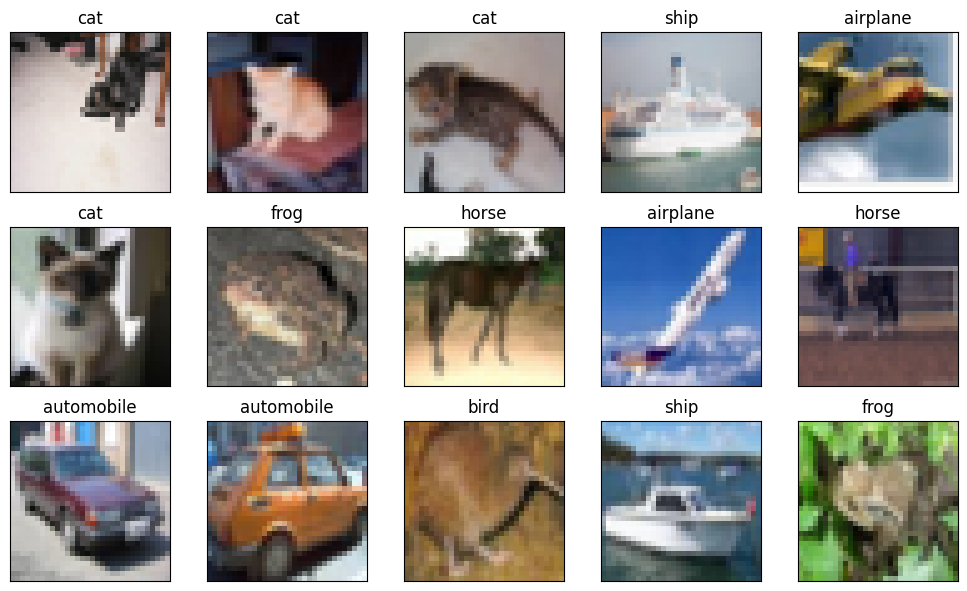

In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in your grid
n_rows = 3
n_cols = 5

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

# Replace with your own logic to select images
selected_indices = np.random.choice(len(X_test), n_rows * n_cols)

for i, ax in enumerate(axes.flat):
    if i < len(selected_indices):
        img_index = selected_indices[i]
        img = X_test[img_index]
        label = y_classes[y_test[img_index][0]]

        # Display the image with its label
        ax.imshow(img)
        ax.set_title(f"{label}")
    else:
        ax.axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

In [ ]:
inputs = keras.Input(shape=(32,32,3))

x = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(64, 3, activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(128, 3, activation='relu')(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

#Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

#Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5051 - sparse_categorical_accuracy: 0.4479 - val_loss: 1.2337 - val_sparse_categorical_accuracy: 0.5535
Epoch 2/50
 504/1563 [========>.....................] - ETA: 1:02 - loss: 1.1700 - sparse_categorical_accuracy: 0.5844

In [ ]:
model.save('my_model.keras')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_preds = model.predict(X_test)
y_test_preds = np.argmax(y_test_preds, axis=1)

print("Test Accuracy : {}".format(accuracy_score(y_test, y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test, y_test_preds, target_names=y_classes))

313/313 [==============================] - 3s 9ms/step
Test Accuracy : 0.7022

Confusion Matrix : 
[[850  36  30  15   6   9   3  15  11  25]
 [ 20 939   4   5   1   3   3   3   3  19]
 [105  19 665  57  31  50  34  30   4   5]
 [ 36  40  78 548  41 175  34  34   7   7]
 [ 63  22 103  72 537  54  50  84  11   4]
 [ 19  18  61 186  31 622  10  47   2   4]
 [ 15  37  65  70  19  31 737  11   8   7]
 [ 27  21  30  33  27  56   4 786   4  12]
 [182  84  17  14   2  13   3   4 657  24]
 [ 49 201  18   9   1  12   3  12  14 681]]

Classification Report :
              precision    recall  f1-score   support

    airplane       0.62      0.85      0.72      1000
  automobile       0.66      0.94      0.78      1000
        bird       0.62      0.67      0.64      1000
         cat       0.54      0.55      0.55      1000
        deer       0.77      0.54      0.63      1000
         dog       0.61      0.62      0.61      1000
        frog       0.84      0.74      0.78      1000
       horse

In [ ]:
def showImage(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])
  plt.show()

In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 5000, replace=False)]  # Choose an appropriate size for the background dataset
explainer = shap.DeepExplainer(model, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = explainer.shap_values(X_train[:20])

1563/1563 [==============================] - 14s 9ms/step


ValueError: ignored

In [ ]:
# Get the actual labels as class indices
actual_labels_indices = y_test[:10].flatten()

# Get model predictions few examples in X_test
probs = model.predict(X_test[:10])

# Get the predicted labels by finding the class with the highest probability
predicted_labels_indices = [np.argmax(prob) for prob in probs]

# Define a list of class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Map actual and predicted class indices to class labels
actual_labels = [class_labels[i] for i in actual_labels_indices]
predicted_labels = [class_labels[i] for i in predicted_labels_indices]

print("Actual Labels: {}".format(actual_labels))
print("Predicted Labels: {}".format(predicted_labels))


1/1 [==============================] - 0s 26ms/step
Actual Labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
Predicted Labels: ['dog', 'automobile', 'airplane', 'airplane', 'deer', 'dog', 'automobile', 'frog', 'cat', 'automobile']


In [ ]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values))

10


In [ ]:

# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values[9]))

1


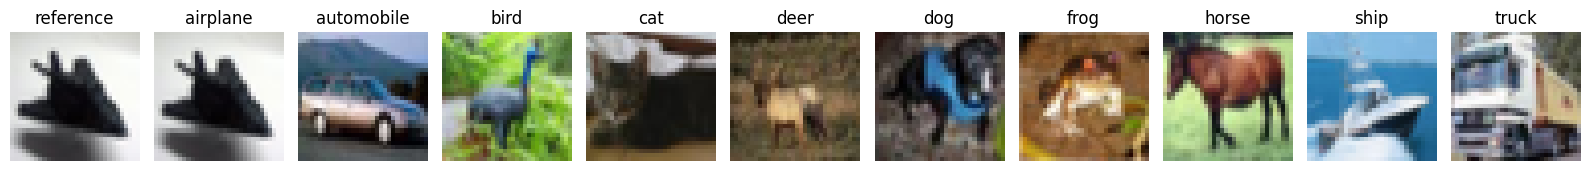

In [ ]:
# Name of the classes
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Save an example for each category
images_dict = dict()
for i, label in enumerate(y_train):
    if len(images_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in images_dict:
        # Reshape the image to its original shape (32, 32, 3)
        images_dict[label_int] = X_train[i].reshape((32, 32, 3))

# Normalize images
for k, v in images_dict.items():
  v = v.astype('float32') / 255

# Plot
def plot_categories(images):

  fig, axes = plt.subplots(1, 11, figsize=(16, 15))
  axes = axes.flatten()

  # Reference
  ax = axes[0]
  ax.set_title("reference")
  ax.imshow(images_dict[0])
  ax.set_axis_off()

  # Other classes
  for k, v in images.items():
    ax = axes[k+1]
    ax.imshow(v, cmap='gray')
    ax.set_title(f"{y_classes[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  return axes

# Reshape images
for k, v in images_dict.items():
  v = v.reshape((32, 32, 3))

# Plot
axes = plot_categories(images_dict)
plt.show()

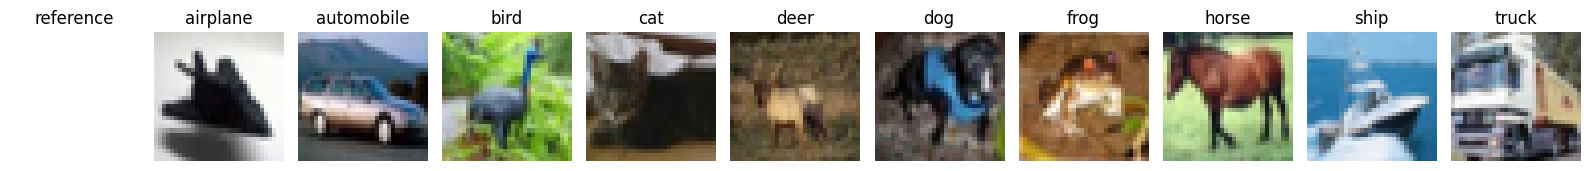

In [ ]:
# Name of the classes
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Save an example for each category
images_dict = dict()
for i, label in enumerate(y_train):
    if len(images_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in images_dict:
        # Reshape the image to its original shape (32, 32, 3)
        images_dict[label_int] = X_train[i].reshape((32, 32, 3))

# Function to plot images
def plot_categories(images):
    fig, axes = plt.subplots(1, 11, figsize=(16, 15))
    axes = axes.flatten()

    # Plot empty canvas
    ax = axes[0]
    dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
    ax.set_title("reference")
    ax.set_axis_off()
    ax.imshow(dummy_array, interpolation='nearest')

    # Plot an image for every category
    for k, v in images.items():
        ax = axes[k + 1]  # Use k + 1 to avoid accessing axes[0] again
        ax.imshow(v, cmap=plt.cm.binary)
        ax.set_title(f"{y_classes[k]}")
        ax.set_axis_off()

    plt.tight_layout()
    return axes  # Return the 'axes' variable

# Use the function to plot
axes = plot_categories(images_dict)
plt.show()


In [ ]:
# Take a random sample of 5000 training images
background = X_train[np.random.choice(X_train.shape[0], 2000, replace=False)]

# Use DeepExplainer to explain predictions of the model
e = shap.DeepExplainer(model, background)

# Compute the values
#shap_values = e.shap_values(X_test[1:5])

In [ ]:
# Save an example of each class from the test set
X_test_dict = dict()
for i, label in enumerate(y_test):
    if len(X_test_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in X_test_dict.keys():
        X_test_dict[label_int] = X_test[i]

# Convert to a list preserving the order of classes
X_test_each_class = [X_test_dict[i] for i in sorted(X_test_dict)]

# Convert to a NumPy array
X_test_each_class = np.asarray(X_test_each_class)

# Print the shape of the tensor
print(f"X_test_each_class tensor has shape: {X_test_each_class.shape}")

X_test_each_class tensor has shape: (10, 32, 32, 3)


In [ ]:
#Compute predictions
predictions = model.predict(X_test_each_class)

#Apply argmax to get predicted class
np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 25ms/step


array([0, 9, 3, 3, 0, 5, 4, 7, 8, 9])

In [ ]:
#Compute shap values using DeepExplainer instance
shap_values = e.shap_values(X_test_each_class)

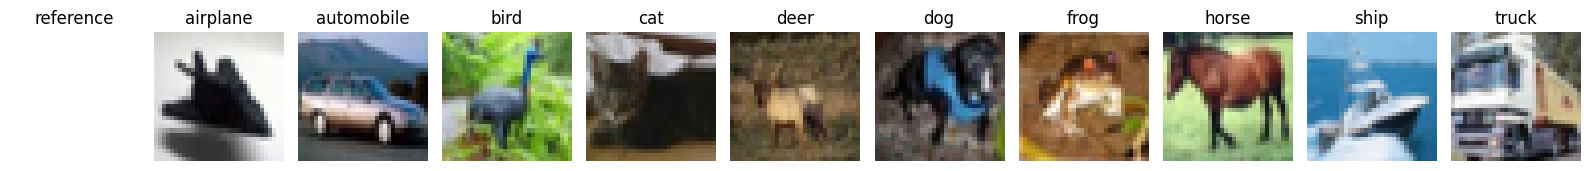

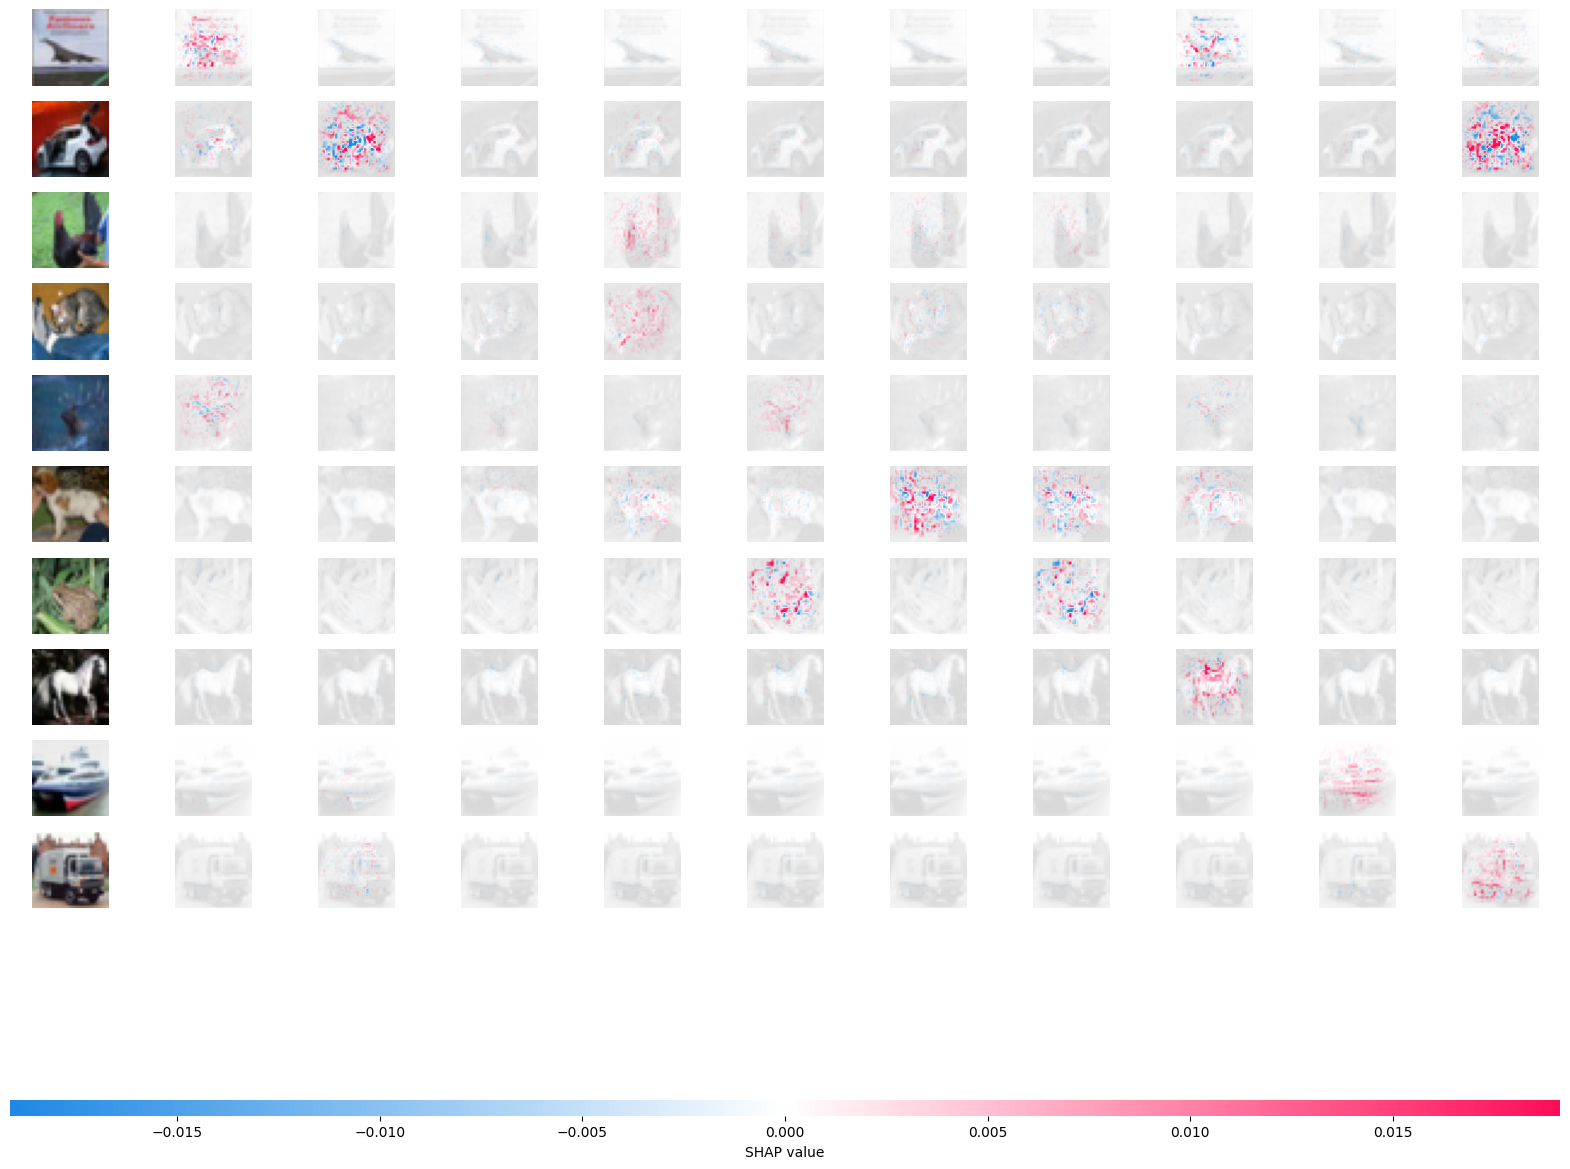

In [ ]:
#Plot reference column
plot_categories(images_dict)

#Print an empty line to separate the two plots
print()

#Plot shap values
shap.image_plot(shap_values, X_test_each_class)

1/1 [==============================] - 0s 25ms/step


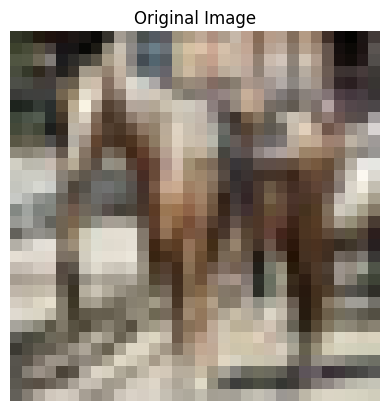

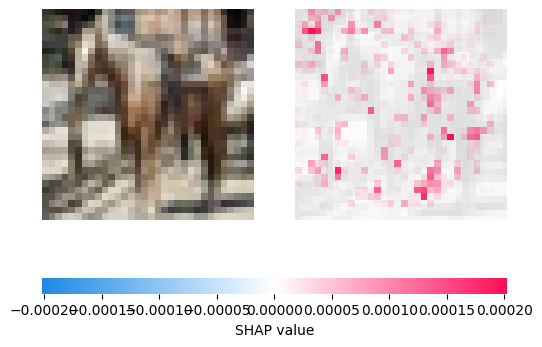

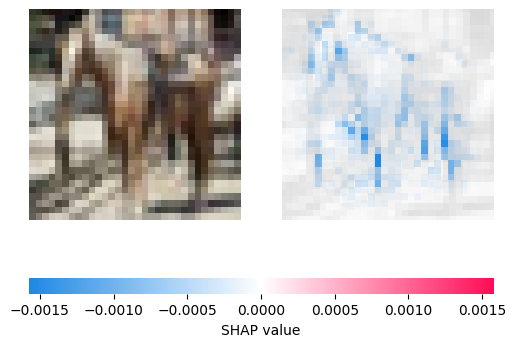

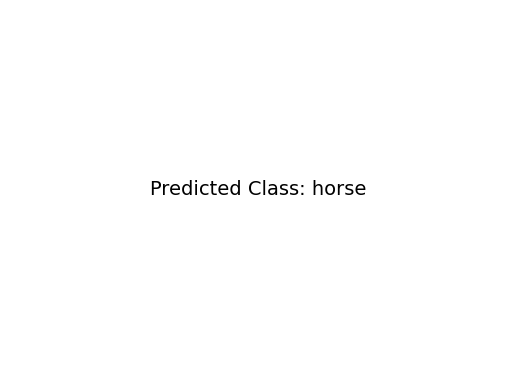

In [ ]:
import matplotlib.pyplot as plt

# Load a single image
image = X_test[6745]

# Expanding dimensions
image = np.expand_dims(image, axis=0)

# Getting SHAP values fro that image
shap_values = explainer.shap_values(image)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Plotting the original image
plt.imshow(image[0])
plt.title("Original Image")
plt.axis('off')
plt.show()

# Plotting image with only positive attributions
positive_shap = np.where(shap_values[0] > 0, shap_values[0], 0)
shap.image_plot((positive_shap), image)
#plt.title("Positive Attributions")
#plt.axis('off')
#plt.show()

# Plotting image with only negative attributions
negative_shap = np.where(shap_values[0] < 0, shap_values[0], 0)
shap.image_plot([negative_shap], image)
#plt.title("Negative Attributions")
#plt.axis('off')
#plt.show()

# Displaying the predicted class
plt.text(0.5, 0.5, f"Predicted Class: {y_classes[predicted_class]}", fontsize=14, ha='center')
plt.axis('off')
plt.show()


In [ ]:
# Load your pre-trained model
model = keras.models.load_model('my_model.keras')  # Replace with the path to your model file


In [ ]:
# Define a function to compute Grad-CAM
def compute_grad_cam(model, img_array, last_conv_layer_name):
    # Get the model's output tensor and the specified layer
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Get the predicted class index
    pred_class = np.argmax(model.predict(img_array)[0])

    # Compute the gradients with respect to the predicted class
    with tf.GradientTape() as tape:
        last_conv_output, model_output = grad_model(img_array)
        class_output = model_output[:, pred_class]
    grads = tape.gradient(class_output, last_conv_output)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the heatmap
    last_conv_output = last_conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_output), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy(), pred_class

1/1 [==============================] - 0s 88ms/step


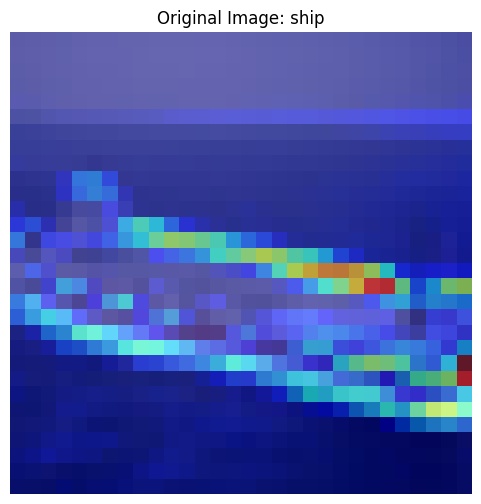

In [ ]:
# Choose an image from the test set
img = X_test[54]

# Preprocess the image for model input
img_array = np.expand_dims(img, axis=0)

# Specify the name of the last convolutional layer in your model
last_conv_layer_name = "conv2d"  # You should replace this with the actual name

# Compute the Grad-CAM heatmap and get the predicted class
heatmap, pred_class = compute_grad_cam(model, img_array, last_conv_layer_name)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f'Original Image: {y_classes[pred_class]}')

# Display the Grad-CAM heatmap as an overlay
plt.imshow(heatmap, cmap='jet', alpha=0.6)
plt.show()

In [ ]:
# Define a function to compute Grad-CAM
def compute_grad_cam(model, img_array, last_conv_layer_name, threshold=0.5):
    # Get the model's output tensor and the specified layer
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Get the predicted class index
    pred_class = np.argmax(model.predict(img_array)[0])

    # Compute the gradients with respect to the predicted class
    with tf.GradientTape() as tape:
        last_conv_output, model_output = grad_model(img_array)
        class_output = model_output[:, pred_class]
    grads = tape.gradient(class_output, last_conv_output)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the heatmap
    last_conv_output = last_conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_output), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    # Apply threshold to create a binary heatmap
    binary_heatmap = (heatmap > threshold).numpy().astype(np.uint8)
    return binary_heatmap, pred_class

1/1 [==============================] - 0s 24ms/step


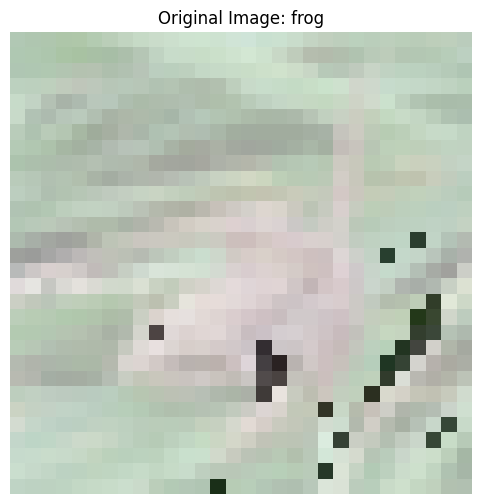

In [ ]:
# Choose an image from the test set
img = X_test[6443]

# Preprocess the image for model input
img_array = np.expand_dims(img, axis=0)

# Specify the name of the last convolutional layer in your model
last_conv_layer_name = "conv2d"

# Compute the Grad-CAM heatmap and get the predicted class
heatmap, pred_class = compute_grad_cam(model, img_array, last_conv_layer_name, threshold=0.5)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis ('off')
plt.title(f'Original Image: {y_classes[pred_class]}')

# Display the binary Grad-CAM heatmap as an overlay
plt.imshow(heatmap, cmap='binary', alpha=0.6)
plt.show()

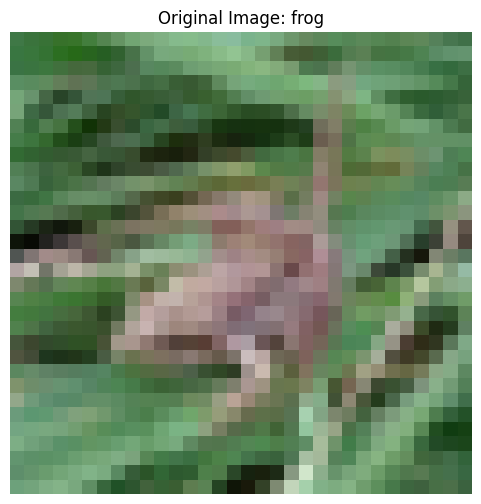

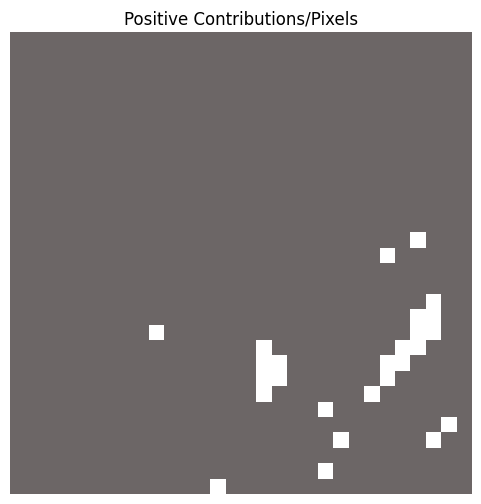

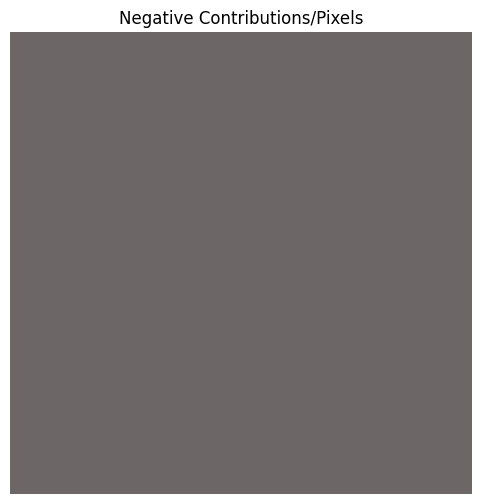

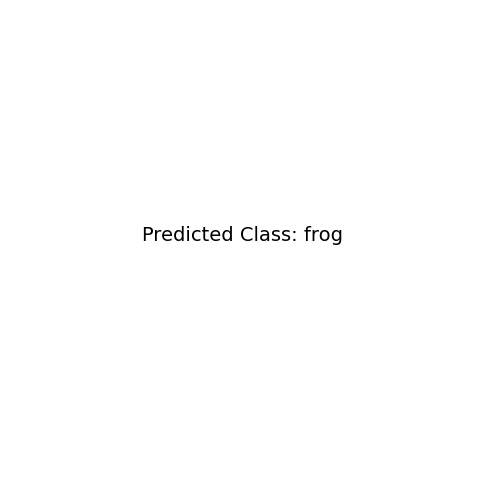

In [ ]:
# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f'Original Image: {y_classes[pred_class]}')
plt.show()

# Create separate images for positive and negative contributions of Grad-CAM
positive_contributions = np.where(heatmap > 0, heatmap, 0)
negative_contributions = np.where(heatmap < 0, -heatmap, 0)

# Display positive contributions
plt.figure(figsize=(6, 6))
plt.imshow(positive_contributions, cmap='hot', alpha=0.6)
plt.axis('off')
plt.title('Positive Contributions/Pixels')
plt.show()

# Display negative contributions
plt.figure(figsize=(6, 6))
plt.imshow(negative_contributions, cmap='hot', alpha=0.6)
plt.axis('off')
plt.title('Negative Contributions/Pixels')
plt.show()

# Display the predicted class
plt.figure(figsize=(6, 6))
plt.text(0.5, 0.5, f'Predicted Class: {y_classes[pred_class]}', fontsize=14, ha='center')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=y_classes)
print("Classification Report:")
print(report)


313/313 [==============================] - 2s 6ms/step
Accuracy: 0.7206
Confusion Matrix:
[[798  19  52  12  10   8   7   8  59  27]
 [ 21 859   4   6   2   6  14   5  27  56]
 [ 74   5 596  65  74  63  71  29  14   9]
 [ 34   8  83 506  59 157  75  37  16  25]
 [ 24   3  75  63 657  38  68  53  13   6]
 [ 19   2  60 176  44 620  27  40  10   2]
 [ 10   7  52  54  37  18 804   6   9   3]
 [ 32   2  36  45  51  46   9 755   6  18]
 [ 69  22  14  13   7   7  10   1 830  27]
 [ 36  86   6  18   6  13   9  17  28 781]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.80      0.75      1000
  automobile       0.85      0.86      0.85      1000
        bird       0.61      0.60      0.60      1000
         cat       0.53      0.51      0.52      1000
        deer       0.69      0.66      0.67      1000
         dog       0.64      0.62      0.63      1000
        frog       0.73      0.80      0.77      1000
       horse       0.79

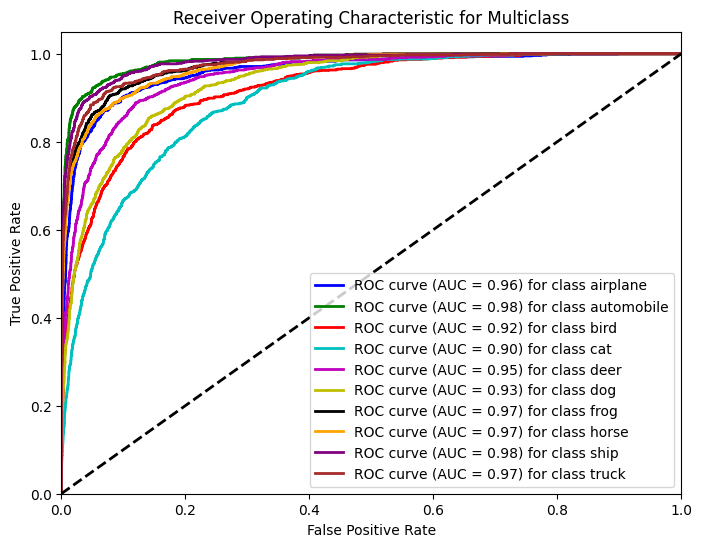

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming multiclass classification
n_classes = len(y_classes)  # Number of classes

fpr = {}  # False Positive Rate for each class
tpr = {}  # True Positive Rate for each class
roc_auc = {}  # AUC for each class

for i in range(n_classes):
    # Create binary labels for the current class vs. all others
    y_true_class = (y_test == i).astype(int)
    y_pred_class = y_pred[:, i]

    # Calculate ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_pred_class)
    roc_auc[i] = roc_auc_score(y_true_class, y_pred_class)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {y_classes[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_classes)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.6895555555555557


In [ ]:
def top_k_accuracy(y_true, y_pred, k):
    top_k_indices = np.argpartition(y_pred, -k, axis=1)  # Find the indices of the top-k predictions
    top_k_classes = top_k_indices[:, -k:]  # Get the top-k predicted classes

    # Create a boolean array where each row represents if the true class is among the top-k predicted classes
    is_true_in_top_k = np.any(top_k_classes == y_true[:, np.newaxis], axis=1)

    # Calculate the top-k accuracy
    top_k_acc = np.mean(is_true_in_top_k)
    return top_k_acc

k = 5  # Adjust k to your desired value
top_k_acc = top_k_accuracy(y_test, y_pred, k)
print(f"Top-{k} Accuracy:", top_k_acc)

Top-5 Accuracy: 0.98


1/1 [==============================] - 0s 30ms/step


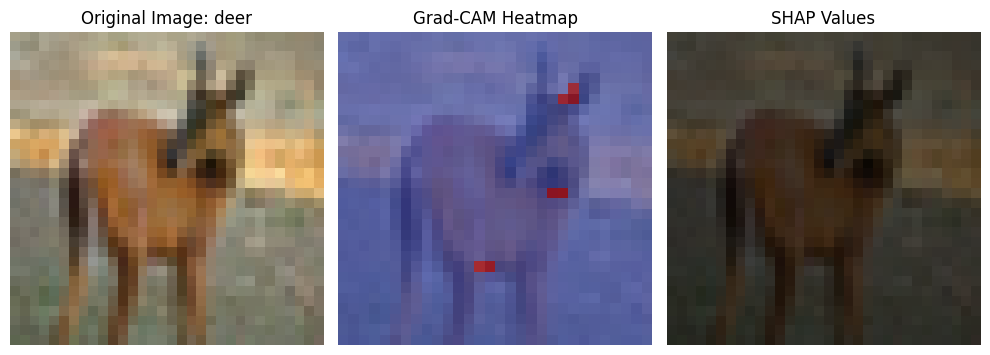

In [ ]:
# Choose an image from the test set
img = X_test[36]

# Preprocess the image for model input
img_array = np.expand_dims(img, axis=0)

# Specify the name of the last convolutional layer in your model
last_conv_layer_name = "conv2d_3"

# Compute the Grad-CAM heatmap and get the predicted class
grad_cam_heatmap, pred_class = compute_grad_cam(model, img_array, last_conv_layer_name)

# Compute SHAP values for the same image
shap_values = explainer.shap_values(img_array)

# Display the original image
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(f'Original Image: {y_classes[pred_class]}')
plt.axis('off')

# Display Grad-CAM heatmap as an overlay
plt.subplot(1, 3, 2)
plt.imshow(img)
plt.imshow(grad_cam_heatmap, cmap='coolwarm', alpha=0.6)
plt.title("Grad-CAM Heatmap")
plt.axis('off')

# Display SHAP values as an overlay
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.imshow(shap_values[0][0], cmap='coolwarm', alpha=0.6)
plt.title("SHAP Values")
plt.axis('off')

plt.tight_layout()
plt.show()
